In [ ]:
import pandas as pd
#1, 
thietbi = pd.read_csv('thietbi.csv')
nguoidung_thietbi = pd.read_csv('nguoidung_thietbi.csv')
nguoidung_sudung = pd.read_csv('nguoidung_sudung.csv')
#thietbi.head()
#nguoidung_thietbi.head()
nguoidung_sudung.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
0,21.97,4.82,1557.33,22787
1,1710.08,136.88,7267.55,22788
2,1710.08,136.88,7267.55,22789
3,94.46,35.17,519.12,22790
4,71.59,79.26,1557.33,22792


In [9]:
#3,
thietbi.rename(columns={ 'Retail Branding': 'Brading', 'Marketing Name' : 'MarketingName'}, inplace= True)


In [10]:
#4 
dfKetQua = pd.merge(nguoidung_sudung, nguoidung_thietbi[['use_id', 'platform', 'device']], on= 'use_id')
dfKetQua.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F


In [30]:
#5
dfKetQua = pd.merge(dfKetQua, thietbi[['Brading','Model']],
                    left_on= 'device',
                    right_on= 'Model')


In [16]:
thietbi.head()

,Brading,MarketingName,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A


In [31]:
#6
dfKetQua[dfKetQua.device.str.startswith('GT')].head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,Brading,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,Samsung,GT-I9505
8,69.80,14.70,25955.55,22801,android,GT-I9505,Samsung,GT-I9505
10,189.10,24.08,519.12,22805,android,GT-I9195,Samsung,GT-I9195
29,85.97,26.94,407.01,22831,android,GT-I8190N,Samsung,GT-I8190N
52,29.54,34.78,33.79,22871,android,GT-I9300,Samsung,GT-I9300


In [34]:
#7
dfKetQua.groupby('Brading').agg({
    'outgoing_mins_per_month' : 'mean',
    'outgoing_sms_per_month' : 'mean',
    'monthly_mb' : 'mean',
    'use_id':'count'
})

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
Brading,,,,
HTC,299.842955,93.059318,5144.077955,44
Huawei,81.526667,9.500000,1561.226667,3
LGE,111.530000,12.760000,1557.330000,2
Lava,60.650000,261.900000,12458.670000,2
Lenovo,215.920000,12.930000,1557.330000,2
Motorola,95.127500,65.666250,3946.500000,16
OnePlus,354.855000,48.330000,6575.410000,6
Samsung,191.010093,92.390463,4017.318889,108
Sony,177.315625,40.176250,3212.000625,16


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5172\2141357303.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = 'Brading', data = dfKetQua, palette='viridis')


<Axes: xlabel='count', ylabel='Brading'>

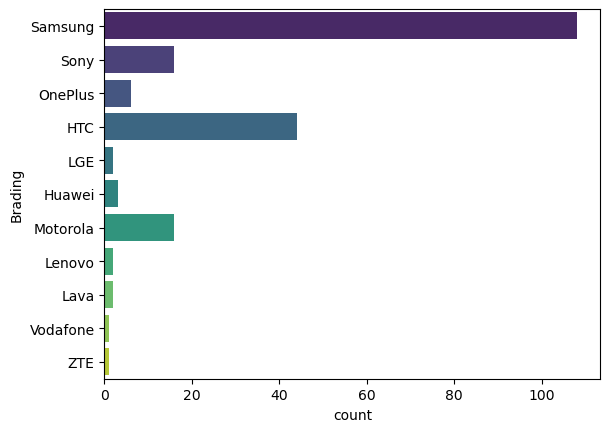

In [39]:
#8
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(y = 'Brading', data = dfKetQua, palette='viridis')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5172\707966095.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='outgoing_mins_per_month', y='Brading', data=dfKetQua, errorbar=None,palette='viridis')


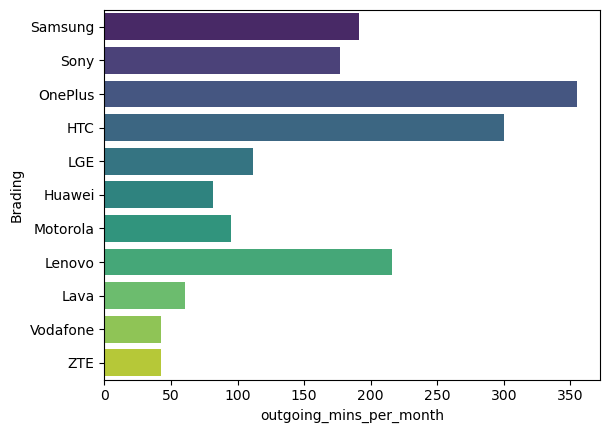

In [40]:
#9
import numpy as np
sns.barplot(x='outgoing_mins_per_month', y='Brading', data=dfKetQua, errorbar=None,palette='viridis')
plt.show()

In [44]:
#11
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest as ztest

ztest(dfKetQua['outgoing_mins_per_month'], value=200)
#không bác bỏ

(0.3678324474067915, 0.7129981730830808)

In [45]:
#12
ztest(dfKetQua['outgoing_sms_per_month'], value=100)
#bác bỏ

(-2.9567085781961198, 0.0031094184670620866)

In [46]:
#13
ztest(dfKetQua['monthly_mb'], value=2048)
#bác bỏ

(5.918078326415772, 3.257248511198872e-09)

In [47]:
#14
import pandas as pd
# Chuyển ma trận về dạng cặp (flatten)
correlation_pairs =  dfKetQua[['outgoing_mins_per_month', 'outgoing_sms_per_month', 'monthly_mb']].corr().unstack()

# Loại bỏ giá trị tương quan của chính nó (giá trị đường chéo = 1)
correlation_pairs = correlation_pairs[correlation_pairs.index.get_level_values(0) != correlation_pairs.index.get_level_values(1)]

# Loại bỏ các cặp trùng lặp (không cần tính cả 2 chiều)
correlation_pairs = correlation_pairs.drop_duplicates()

# Sắp xếp tăng dần
sorted_correlation = correlation_pairs.sort_values()

# Hiển thị kết quả
print(sorted_correlation)


outgoing_sms_per_month   monthly_mb               -0.046049
outgoing_mins_per_month  outgoing_sms_per_month   -0.016494
                         monthly_mb                0.213489
dtype: float64


In [48]:
#15
import pandas as pd
from scipy.stats import pearsonr, spearmanr

# Dữ liệu mẫu
data = {
    'outgoing_mins_per_month': [180, 200, 220, 210, 230, 190],
    'outgoing_sms_per_month': [50, 60, 55, 65, 70, 58]
}
df = pd.DataFrame(data)

# Dữ liệu cột cần kiểm định
x = df['outgoing_mins_per_month']
y = df['outgoing_sms_per_month']

# Kiểm định Pearson
pearson_corr, pearson_p = pearsonr(x, y)
print(f"Pearson correlation: {pearson_corr}, P-value: {pearson_p}")

# Kiểm định Spearman
spearman_corr, spearman_p = spearmanr(x, y)
print(f"Spearman correlation: {spearman_corr}, P-value: {spearman_p}")


# có tương quan


Pearson correlation: 0.7209016910233328, P-value: 0.10597349686174055
Spearman correlation: 0.6571428571428573, P-value: 0.15617492711370237


In [ ]:



# Kích thước chung cho các biểu đồ
plt.figure(figsize=(18, 6))

# Scatterplot giữa Minutes và SMS
plt.subplot(1, 3, 1)
sns.scatterplot(data=dfKetQua, x='outgoing_mins_per_month', y='outgoing_sms_per_month', hue='Brading', )
plt.title('Minutes vs SMS by Brand')
plt.xlabel('Minutes')
plt.ylabel('SMS')


# Hiển thị toàn bộ biểu đồ
plt.tight_layout()
plt.show()
